# 1. Installing the necessary libraries

In [1]:
!pip install -q ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 41.8 MB/s eta 0:00:00


# 1. Unzipping the Data
### The data is already structured in a folder structure as required by the Yolo model.

In [2]:
from zipfile import ZipFile

# Specify the path to your ZIP file
zip_file_path = 'dataset.zip'

# Specify the directory where you want to extract the contents
# If left empty or omitted, contents will be extracted to the current working directory
extract_to_path = 'yolo_dataset/'

try:
    with ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to_path)
    print(f"'{zip_file_path}' successfully extracted to '{extract_to_path}'")
except FileNotFoundError:
    print(f"Error: The file '{zip_file_path}' was not found.")
except Exception as e:
    print(f"An error occurred during extraction: {e}")

'dataset.zip' successfully extracted to 'yolo_dataset/'


# 3. EDA
### Performing some exploratory data-analysis

Train images: 682
Train labels: 682
Images without labels: 0
Class distribution: {1: 2540, 2: 587, 0: 98}
Avg bbox width: 0.083, height: 0.123
Min bbox width: 0.003, height: 0.009
Max bbox width: 0.634, height: 0.852


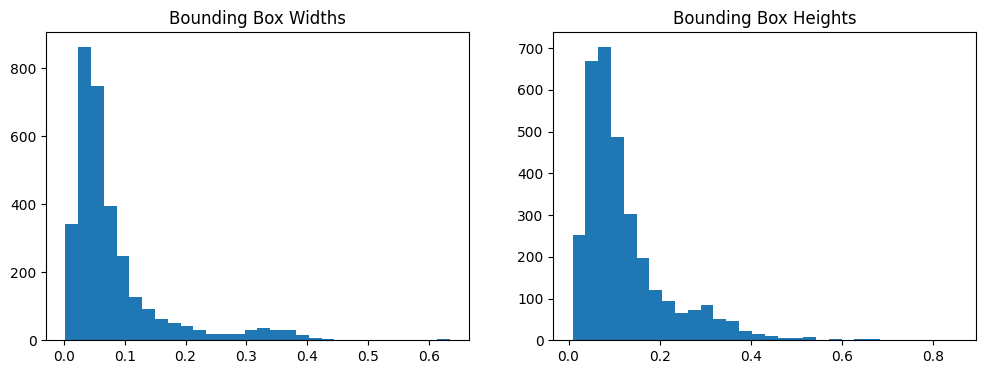

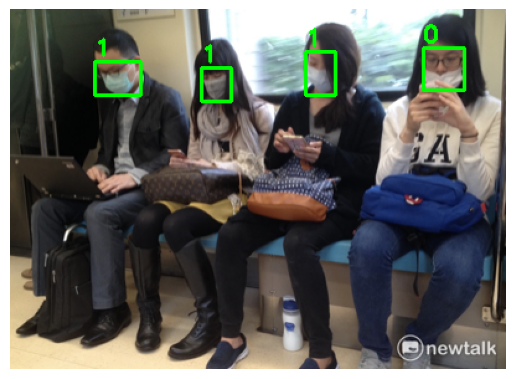

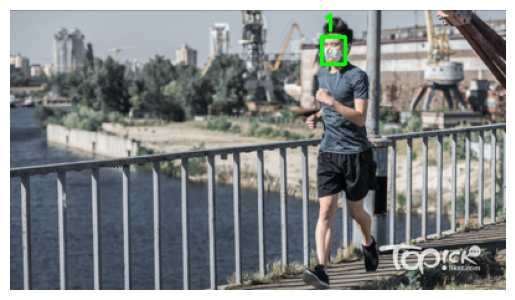

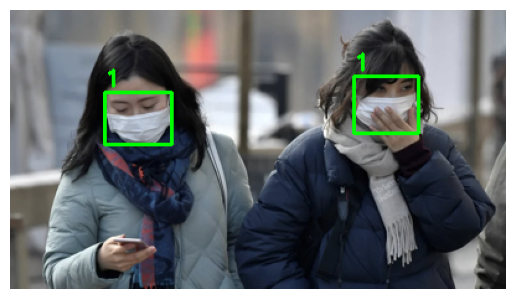

In [3]:
import os
import glob
import matplotlib.pyplot as plt
import cv2
import numpy as np

# Paths
img_dir = "/content/yolo_dataset/images/train"
lbl_dir = "/content/yolo_dataset/labels/train"

# 1. Count images and labels
train_imgs = glob.glob(f"{img_dir}/*")
train_lbls = glob.glob(f"{lbl_dir}/*")
print(f"Train images: {len(train_imgs)}")
print(f"Train labels: {len(train_lbls)}")

# 2. Check for images without labels
no_labels = [img for img in train_imgs if not os.path.exists(
    img.replace("images/train", "labels/train").rsplit(".",1)[0] + ".txt"
)]
print(f"Images without labels: {len(no_labels)}")

# 3. Class distribution
class_counts = {}

for lbl_file in train_lbls:
    with open(lbl_file, "r") as f:
        for line in f:
            cls_id = int(line.split()[0])
            class_counts[cls_id] = class_counts.get(cls_id, 0) + 1

print("Class distribution:", class_counts)

# 4. Bounding box width/height stats
widths, heights = [], []
for lbl_file in train_lbls:
    with open(lbl_file, "r") as f:
        for line in f:
            _, x, y, w, h = map(float, line.split())
            widths.append(w)
            heights.append(h)

print(f"Avg bbox width: {np.mean(widths):.3f}, height: {np.mean(heights):.3f}")
print(f"Min bbox width: {np.min(widths):.3f}, height: {np.min(heights):.3f}")
print(f"Max bbox width: {np.max(widths):.3f}, height: {np.max(heights):.3f}")

# 5. Plot some histograms
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.hist(widths, bins=30)
plt.title("Bounding Box Widths")
plt.subplot(1,2,2)
plt.hist(heights, bins=30)
plt.title("Bounding Box Heights")
plt.show()

# 6. Visualize sample images with annotations
def show_image_with_labels(img_path):
    lbl_path = img_path.replace("images/train", "labels/train").rsplit(".",1)[0] + ".txt"
    img = cv2.imread(img_path)
    h, w, _ = img.shape

    if os.path.exists(lbl_path):
        with open(lbl_path, "r") as f:
            for line in f:
                cls, x, y, bw, bh = map(float, line.strip().split())
                x, y, bw, bh = x*w, y*h, bw*w, bh*h
                x1, y1 = int(x - bw/2), int(y - bh/2)
                x2, y2 = int(x + bw/2), int(y + bh/2)
                cv2.rectangle(img, (x1,y1), (x2,y2), (0,255,0), 2)
                cv2.putText(img, str(int(cls)), (x1,y1-5),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,255,0), 2)

    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.show()

# Show 3 random images
import random
sample_imgs = random.sample(train_imgs, 3)
for img_path in sample_imgs:
    show_image_with_labels(img_path)


In [5]:
from ultralytics import YOLO

# Load a pretrained YOLOv8 model
model = YOLO("yolov8n.pt")

# Train on GPU
model.train(
    data="yolo_dataset/data.yaml",  # path to data.yaml
    epochs=20,                      # number of training epochs
    imgsz=640,                      # image size
    batch=32,                       # adjust based on GPU memory
    device=0,                       # 0 = first GPU, "cpu" = CPU
    name="face_detection_exp1"      # experiment name
)


Ultralytics 8.3.193 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=32, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=yolo_dataset/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=face_detection_exp12, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pret

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x78c9f63cc2f0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04